# Communicate Data Findings: Ford Gobike System Data 
## by (Bakut S Bonat)

### Introduction

The Ford Gobike system data was designed with the following specification in mind:
    
    *Provide the status of the system at this moment.
    *Do not provide information whose primary purpose is historical.
    
Historical data, including station details and ride data is to be provided by a more compact specification designed specifically for such archival purposes. The data in the specification contained in this document is intended for consumption by clients intending to provide real-time (or semi-real-time) transit advice and is designed as such.

Each trip is anonymized and includes: Trip Duration, Start Time and Date,  End Time and Date, Start Station ID, Start Station Name, Start Station Latitude,Start Station Longitude, End Station ID, End Station Name, End Station Latitude, End Station Longitude, Bike ID, User Type(Subscribe or Customer - "Subscriber"=Member or "Customer" = Casual),Member Year of Birth,Member Gender.

Ford GoBike is the Bay Area's new bike share system, with thousands of public bikes for use across the greater San Francisco Bay area. An app was also created to co-piloting for getting around town. Ford has also introduced an ebike called Ford GoBike Plus on April 24th 2018 which is a motorized bike rides. I would think that this would attract more people to ride the bikes without breaking a sweat. For more information on this program, please go to https://www.fordgobike.com and https://s3.amazonaws.com/fordgobike-data/index.html where "2017-fordgobike-tripdata.csv" is the most recent file at the time of this project.

### Preliminary Wrangling

This process includes collection of data from the link provided by udacity as a prerequisite for graduating Data Analyst Nano-degree from https://s3.amazonaws.com/fordgobike-data/index.html and exploration of the data. the goal for this process is to;
    
   1. what is the duration seconds for trips?
   2. Does the above depend on if the user is a subscriber or customer?
   3. who should be our target customers? in terms of advertising, who are our target audience?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#from mpl_toolkits.basemap import Basemap
%matplotlib inline

Importation of dataset into jupyter notebook

In [2]:
#code for importing dataset
df= pd.read_csv('201903-fordgobike-tripdata.csv')

In [3]:
#code for the shape of the dataset
df.shape

(256299, 16)

In [4]:
#code for the basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256299 entries, 0 to 256298
Data columns (total 16 columns):
duration_sec               256299 non-null int64
start_time                 256299 non-null object
end_time                   256299 non-null object
start_station_id           256078 non-null float64
start_station_name         256078 non-null object
start_station_latitude     256299 non-null float64
start_station_longitude    256299 non-null float64
end_station_id             256078 non-null float64
end_station_name           256078 non-null object
end_station_latitude       256299 non-null float64
end_station_longitude      256299 non-null float64
bike_id                    256299 non-null int64
user_type                  256299 non-null object
member_birth_year          244576 non-null float64
member_gender              244576 non-null object
bike_share_for_all_trip    256299 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 31.3+ MB


so, for me to be able to carry out further analysis on sales perpective like target cutomers by age, i will need a "member_age" column.

In [5]:
#Code to create a member age column
df['member_age'] = 2018 - df['member_birth_year']

### What is the structure of your dataset?

>The dataset contains 256299 records for 16 columns, datatypes such as int, object, float and below is a proof of strings are stored as object in python and a sample view of the dataset. 


In [6]:
#Test codes for data structure
type('start_station_name')

str

In [7]:
#Test codes for data structure
type('user_type')

str

In [8]:
#Test codes for data structure
type('member_gender')

str

In [9]:
#Test codes for data structure
type('end_station_name')

str

In [10]:
#code for the first 5 data rows of data in the dataset
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,53588,2019-03-31 20:59:21.8780,2019-04-01 11:52:30.2000,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,1980.0,Other,No,38.0
1,74305,2019-03-31 13:56:46.0050,2019-04-01 10:35:11.4540,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,1990.0,Male,No,28.0
2,79789,2019-03-31 11:48:34.2010,2019-04-01 09:58:23.8240,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,345.0,Hubbell St at 16th St,37.766483,-122.398279,2317,Customer,NaN,NaN,No,NaN
3,59315,2019-03-31 16:48:54.3740,2019-04-01 09:17:30.1540,92.0,Mission Bay Kids Park,37.772301,-122.393028,49.0,S Park St at 3rd St,37.780760,-122.394989,6631,Customer,1996.0,Female,No,22.0
4,47886,2019-03-31 19:54:24.1480,2019-04-01 09:12:30.8170,339.0,Jackson St at 11th St,37.800002,-122.266438,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,5241,Subscriber,1974.0,Female,No,44.0


### What is/are the main feature(s) of interest in your dataset?

> features of intrest is to find the duration seconds for trips taken , whether duration in seconds for subscriber differs from customer , if so then what would this difference mean to us ? Hence , Duration and user_type seems to be a good start but thinking from a sales perspective we must also evaluate which station is more profitable for us. Also , from other sales persepctive we may also want to see about the type of customer on the basis of gender to target more customers use our service.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>Main features would be

    Station start
    Duration
    Station end
    User_type

>From sales perspective
    
    Member_gender
    member_age


> A brief look at the statiscal summary of the dataset before looking more into single variables.

In [11]:
#code to a brief summary Statistics
df.describe(include= 'all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
count,256299.000000,256299,256299,256078.000000,256078,256299.000000,256299.000000,256078.000000,256078,256299.000000,256299.000000,256299.000000,256299,244576.000000,244576,256299,244576.000000
unique,NaN,256280,256278,NaN,346,NaN,NaN,NaN,346,NaN,NaN,NaN,2,NaN,3,2,NaN
top,NaN,2019-03-18 09:50:22.0240,2019-03-05 17:10:49.6920,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No,NaN
freq,NaN,2,2,NaN,5307,NaN,NaN,NaN,7139,NaN,NaN,NaN,219323,NaN,180657,233962,NaN
mean,807.873831,NaN,NaN,141.352424,NaN,37.771769,-122.356164,140.011317,NaN,37.771933,-122.355815,4916.572531,NaN,1984.989050,NaN,NaN,33.010950
std,2056.305336,NaN,NaN,115.408300,NaN,0.097027,0.114907,115.386716,NaN,0.096979,0.114620,1687.339951,NaN,10.077825,NaN,NaN,10.077825
min,61.000000,NaN,NaN,3.000000,NaN,37.315158,-122.453704,3.000000,NaN,37.315158,-122.453704,11.000000,NaN,1878.000000,NaN,NaN,17.000000
25%,338.000000,NaN,NaN,47.000000,NaN,37.770083,-122.415204,44.000000,NaN,37.770407,-122.413004,4525.000000,NaN,1980.000000,NaN,NaN,26.000000
50%,542.000000,NaN,NaN,104.000000,NaN,37.780787,-122.398870,102.000000,NaN,37.781010,-122.398525,5369.000000,NaN,1987.000000,NaN,NaN,31.000000
75%,854.000000,NaN,NaN,240.000000,NaN,37.797280,-122.293528,239.000000,NaN,37.797320,-122.293528,6127.000000,NaN,1992.000000,NaN,NaN,38.000000


The statistical summary above showed some intresting insights:

   1. top ratings for variables as; start_station_name is "market st at 10th st" similarly end_station_name is "San Francisco Caltrain Station 2 (townsend St...". thats most bikes starts and end in these station respectively.
   2. Minimum duration in seconds is 61 seconds and the maximum suration time is 85676 seconds,
   3. with a total record of 256299, 219323 user_type are Subscribers that is to say most customers are Subscribers.
   4. with frequency number of 180657 male turns out to be the most of members_gender.
    
However, evaluation of the coverage of the data would enable us to understand how healthy the dataset is.

In [12]:
#code: evaluating coverage of data
pd.DataFrame(((df.count()- df.isnull().sum())/df.count())*100 , columns=['coverage'])

,coverage
duration_sec,100.000000
start_time,100.000000
end_time,100.000000
start_station_id,99.913698
start_station_name,99.913698
start_station_latitude,100.000000
start_station_longitude,100.000000
end_station_id,99.913698
end_station_name,99.913698
end_station_latitude,100.000000


Data coverage deals with the quality of the dataset, its completeness, validity, consistency, timeliness and accuracy that makes data appropriate for specific use

Further more, this can be viewed graphically for more understanding.

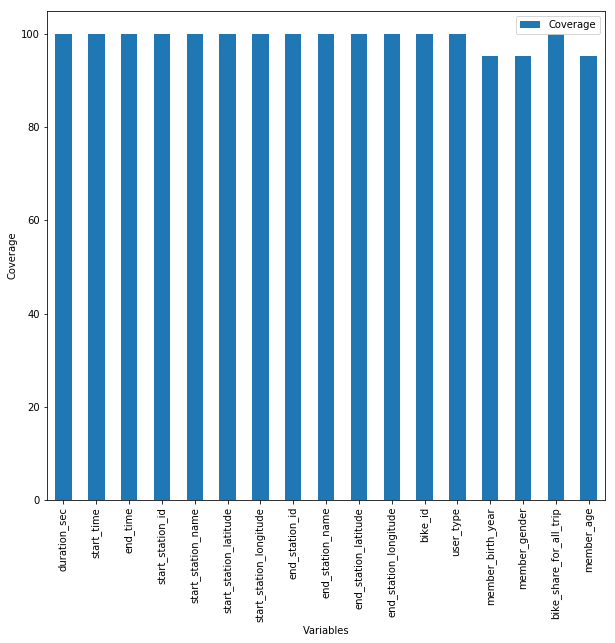

In [13]:
#code: the graphical plot of data coverage
dc  = pd.DataFrame(((df.count()-df.isnull().sum())/df.count())*100 , columns=['Coverage']).plot(kind = 'bar' , figsize = (10,9))
dc.set(xlabel = 'Variables' , ylabel = 'Coverage')
plt.show()


As shown above a good looking data coverage graph like this can be helpful for further analysis, modelling and feature selection.

## Univariate Exploration

> **Duration in Seconds** Duration shows the time taken to travel and help identify users and point out other key features.



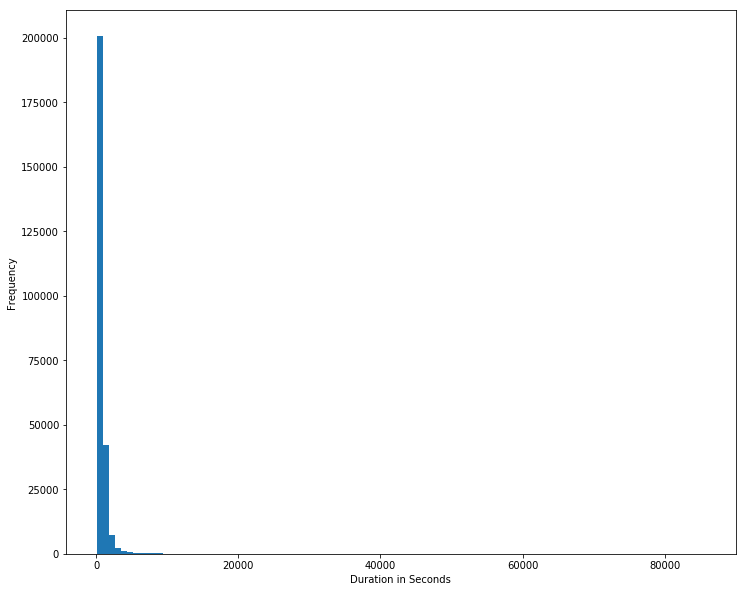

In [14]:
#Code: graph for duration in seconds
df['duration_sec'].plot.hist(bins=100, figsize=(12, 10)).set(xlabel='Duration in Seconds')
plt.show()

In [15]:
#Code: brief summary statistics
df['duration_sec'].describe().to_frame()

,duration_sec
count,256299.000000
mean,807.873831
std,2056.305336
min,61.000000
25%,338.000000
50%,542.000000
75%,854.000000
max,85676.000000


This shows an average trip for users as about 807 seconds, with a perfect understanding of explanatory data analysis on the central value and variablity; the use of a box plot would better explain this distributions.

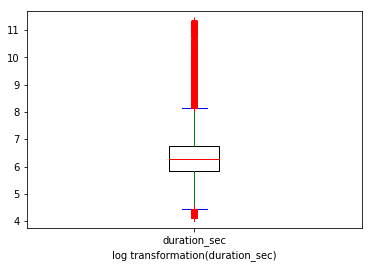

In [16]:
#Code: for Log transformation Boxplot
color = dict(boxes= 'black', whiskers= 'green', medians= 'red', caps='blue')
np.log(df['duration_sec']).plot.box(color= color, sym= 'r+').set(xlabel='log transformation(duration_sec)')
plt.show()

Log transformation was used to see a good plot for duration and handling outliers. To also figure out how many variables are above the Average trip duration, lets create a distribution bin below.

In [17]:
#Code create a distribution bin 
print("Length of duration below 5000 :-  " +
      str(df.query('duration_sec < 5000').shape[0]))
print("Length of duration above 10000 and below 200000 :-  " +
      str(df.query('duration_sec > 10000 and duration_sec < 20000').shape[0]))
print("Length of duration above 20000 and below 300000 :-  " +
      str(df.query('duration_sec > 20000 and duration_sec < 30000').shape[0]))
print("Length of duration above 30000 and below 400000 :-  " +
      str(df.query('duration_sec > 30000 and duration_sec < 40000').shape[0]))
print("Length of duration above 40000 and below 500000 :-  " +
      str(df.query('duration_sec > 40000 and duration_sec < 50000').shape[0]))
print("Length of duration above 50000  :-  " +
      str(df.query('duration_sec > 50000').shape[0])) 

print('total sample length :- ' + str(df.shape[0]))

Length of duration below 5000 :-  253962
Length of duration above 10000 and below 200000 :-  525
Length of duration above 20000 and below 300000 :-  129
Length of duration above 30000 and below 400000 :-  73
Length of duration above 40000 and below 500000 :-  36
Length of duration above 50000  :-  142
total sample length :- 256299


A total sample length of 256299 and about 253962 records was below 5000 that a 99.09% of our data. That is to say we can ignore the percentage of ourlier as our data is valid enough to be model further. a better look at our with a distribution range belwo 20000 can be see below...

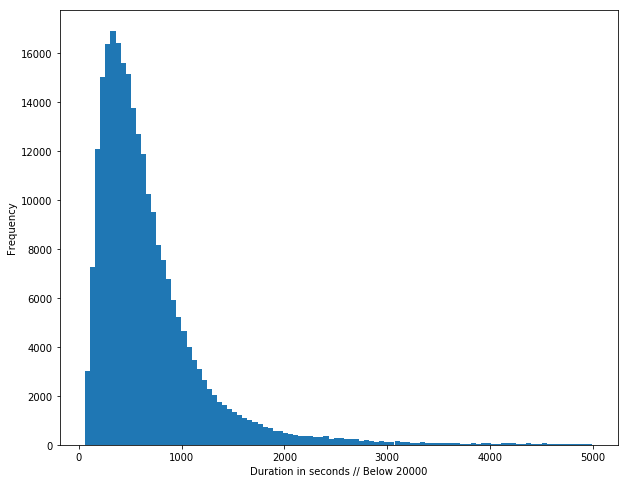

In [18]:
#Code: distribution graph
df.query('duration_sec < 5000')['duration_sec'].plot.hist(bins = 100 ,
                                                          figsize = (10 , 8)).set(xlabel = 'Duration in seconds // Below 20000')
plt.show()

In [19]:
#Code: brief summary info
df.query('duration_sec < 5000')['duration_sec'].describe().to_frame()

,duration_sec
count,253962.000000
mean,683.431884
std,556.072359
min,61.000000
25%,336.000000
50%,537.000000
75%,842.000000
max,4997.000000


    >The distribution above shows this plot is skewed to the right (positively skewed), after plotting a duration <5000.
    
    >The use of log transformation to show normality in the boxplot.
    
    >The outlier in duration above 5000 was 1.1%.
    
Already i am thinking people dont ride bikes for longer durations

#### Start_station_name and End_station_name

Firstly, an exploration of stations where trips begun from, a look at the top 10 stations.

In [20]:
#Code: length count
len(df['start_station_name'].value_counts())

346

There are about 346 station trips begun from but i will be looking at top 10 stations below.

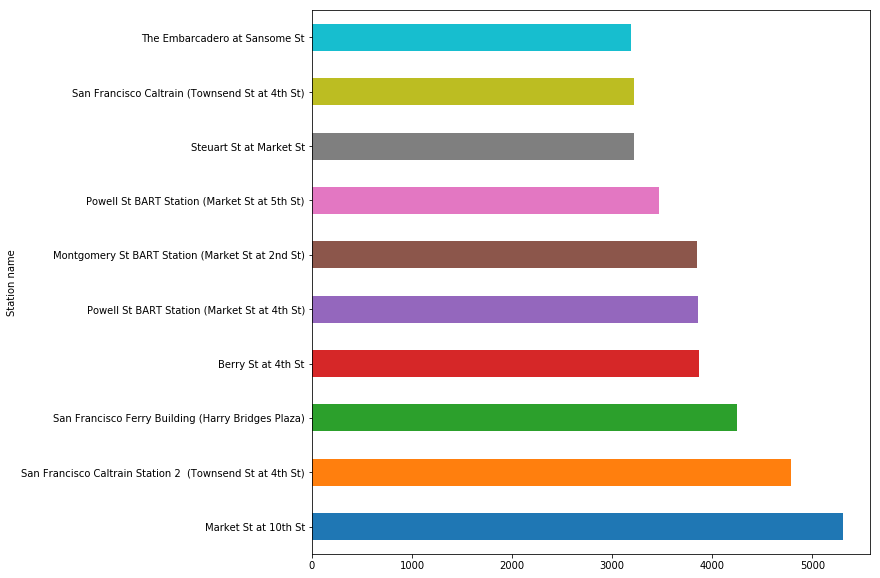

In [21]:
df['start_station_name'].value_counts().sort_values(ascending = False)[:10].plot(kind = 'barh' ,
                                                                                 figsize = (10,10)).set(ylabel = 'Station name')
plt.show()

Secondly, an exploration of stations where trips ended, a look at the top 10 stations.

In [22]:
len(df['end_station_name'].value_counts())

346

There are about 346 station trips ended, but i will be looking at top 10 stations below

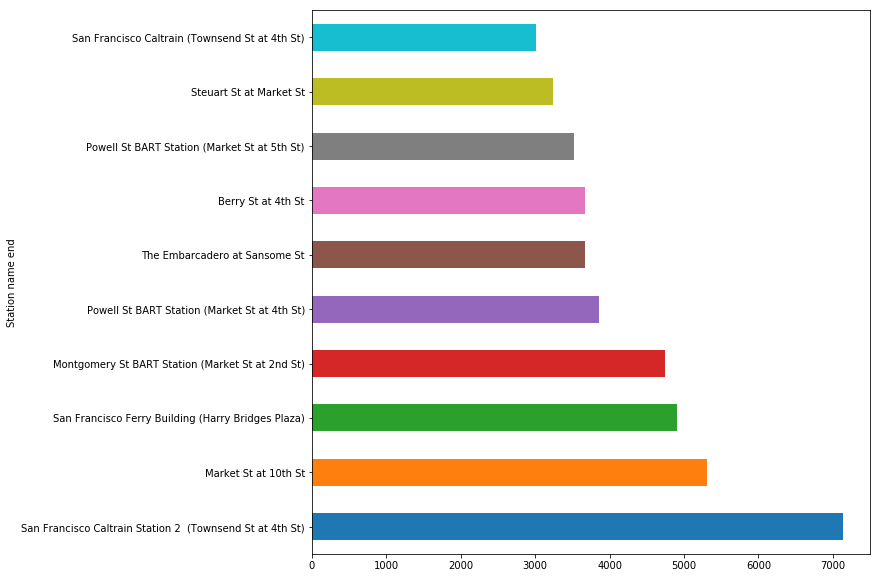

In [23]:
df['end_station_name'].value_counts().sort_values(ascending = False)[:10].plot(kind = 'barh' 
                                                                               , figsize = (10,10)).set(ylabel = 'Station name end')
plt.show()


**Market St at 10th St** turns out to be the start station for most users and **San Francisco Caltrain Station 2(Twonsend St at 4th St)** turned out to be the end station for most users

### who are the users 

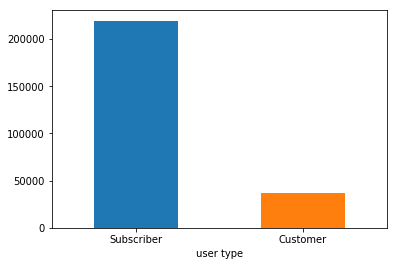

In [24]:
(df.user_type.value_counts().plot(kind = 'bar' , rot = 0).set(xlabel = 'user type'))
plt.show()

Subscribers turned out to be the most users with over 200 thousand rides, where further view of the users gender and age can be used to have a clear picture of who the users are.

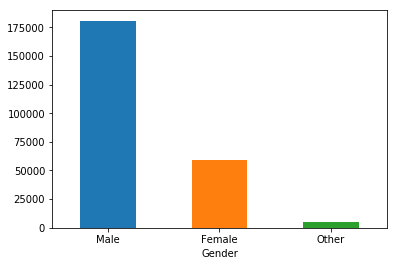

In [25]:
#Code to show users by gender
(df.member_gender.value_counts().plot(kind = 'bar',rot = 0).set(xlabel = 'Gender'))
plt.show()

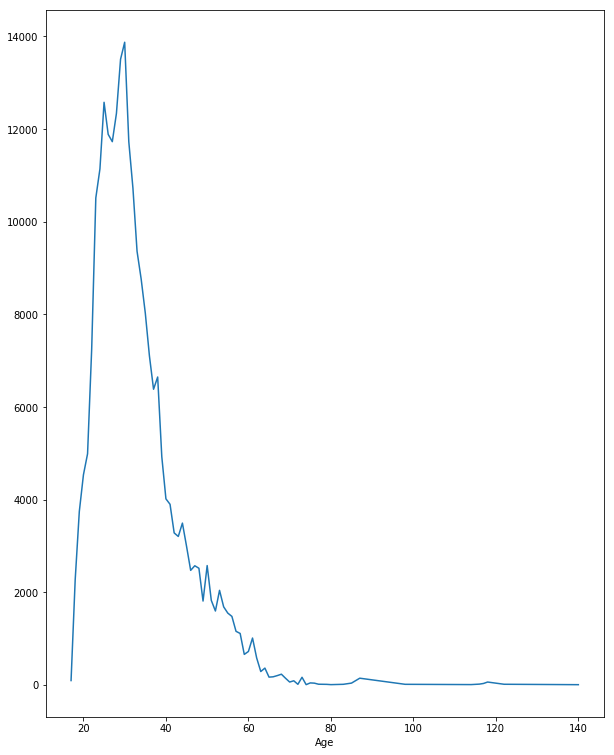

In [26]:
#code to show users by age
(df.member_age.value_counts().sort_index().plot(kind = 'line' , figsize = (10,13)).set(xlabel = 'Age'))
plt.show()

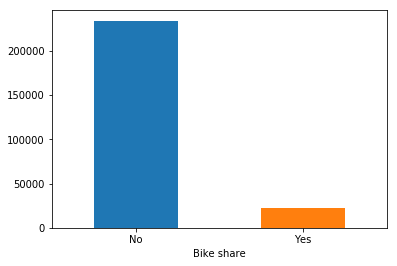

In [27]:
#Code to show if users share trips
df['bike_share_for_all_trip'].value_counts().plot(kind = 'bar' , rot = 0).set(xlabel = 'Bike share')
plt.show()

### Findings 

1. Most users dont share their trips
2. users age graph more younger people take trips than older people, that explains why it is positively skewed.
3. Male users are the majority users of the bike.
4. And finally most of the users are subscribers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1. **Duration in seconds:** showed the time taken for trips and pointed out other features,the use of log transformation was needed to show the spread of the data and outliers were discovered with a percentage of 1.1% of the data above 5000 seconds, for future modeling the otlier will be removed for better inferences.
> 2. **Start Station and End Station:** Eplored 346 start and end stations of trips, where Market St at 10th St was the most frequent start station and San Francisco Station 2 (Townsend St at 4th St).
> 3. **Users:** Most of the users are Subscribers, males, between the ages of 18 - 40 years, who dont share their bike trips.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i had to Adjust or create a member age column for me to be able to carry out analysis on age group and all.

## Bivariate Exploration
A quick look at the correlation between varriables

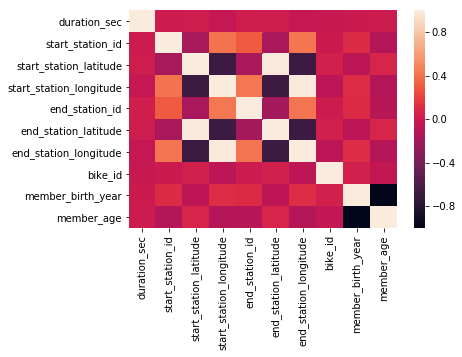

In [28]:
sb.heatmap(df.corr())
plt.show()

***From the earlier explored univariate, i would like to explore more on the sales perpesctive of selling to members gender group and members age group.***

**Member Gender**

A look at durations in seconds for trips by users_type and genders

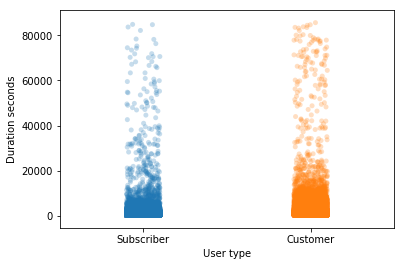

In [29]:
#Code to show relationship between user_type and durations in seconds
g = sb.stripplot(x=df["user_type"] , y=df['duration_sec'] , jitter=True , alpha = 0.25)
g.set_xlabel('User type')
g.set_ylabel('Duration seconds')
plt.show()

Intresting that customers take long  duration seconds on trips than the subscribers who are the most users.

further a look at which gender takes more duration, which implies more revenue from a marketing perspective below.

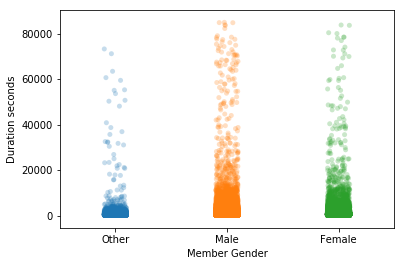

In [30]:
#Code to show which gender takes more duration
g = sb.stripplot(x=df["member_gender"] , y=df['duration_sec'] , jitter=True ,alpha = 0.25)
g.set_xlabel('Member Gender')
g.set_ylabel('Duration seconds')
plt.show()

The Male and Female gender looks the same, both genders travel the similar durations.

Also explorations on  which gender are user_type(Subscribers)?

In [31]:
pd.crosstab(df["user_type"] , df['member_gender'])

member_gender,Female,Male,Other
user_type,,,
Customer,9118,21131,741
Subscriber,49886,159526,4174


Shows that most subscribers are males when compared to other genders there is a significant difference while there isn't much difference as the male gender is the highest for costumers user_type. A graphically representation below.

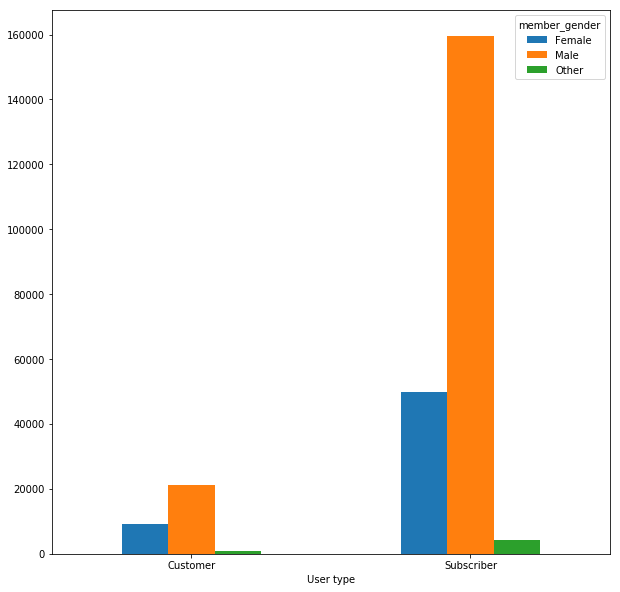

In [32]:
pd.crosstab(df["user_type"] , df['member_gender']).plot(kind = 'bar' , figsize = (10,10) , rot = 0).set(xlabel = 'User type')
plt.show()

**Age Group**

Explorations on members age  to duration in seconds

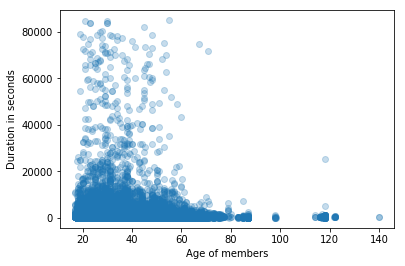

In [33]:
g = sb.regplot(x='member_age',
            y='duration_sec',
            data=df,
            fit_reg=False,  # do not fit a regression line
            x_jitter=0.1,  # could also dynamically set this with range of data
            y_jitter=0.1,
            scatter_kws={'alpha': 0.25 })
g.set_xlabel('Age of members')
g.set_ylabel('Duration in seconds')
plt.show()

The plot above shows members above 20 and 45 years tend to take longer durations

*A look at users above the birth year 1980 in terms of gender*

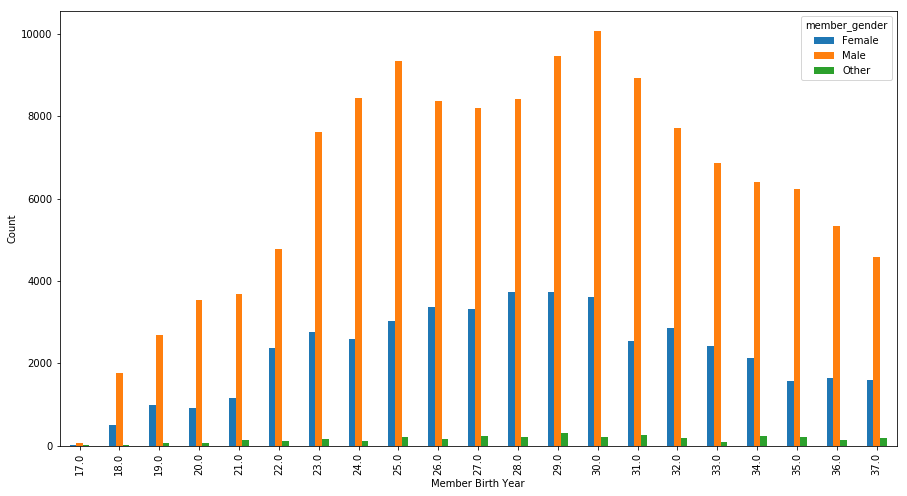

In [34]:
pd.crosstab(df.query('member_birth_year > 1980')['member_age'] ,
            df.query('member_birth_year > 1980')['member_gender']).plot(kind = 'bar' , figsize = (15 ,8)) 
plt.xlabel('Member Birth Year')
plt.ylabel('Count')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

    1. Member Gender to durations in seconds: this expolration show male and female gender both travel similar durations, as to earlier univariate expolration of male gender to be the most users
    
    2. User Type to durations in seconds:customers take longer trips than subscribers as to the ealier univariate expolrations of most users are subscribers.
    
    3. Age Group to durations in seconds: memebers of age 20 to 45 years take longer durations in seconds, as to ealier univariate exploration of age 20 t0 40 take more trips in a positively skewed graph.
    
    4. Birth year to Gender: a look at gender birth year above 1980 male at 30 years of age have the highest duration as to women at 28 and 29 years of age.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, i didn't

## Multivariate Exploration


This Section explores more details about the users demographic and habits that can help in advertising  or target customers

**First, based on the member gender and users type**

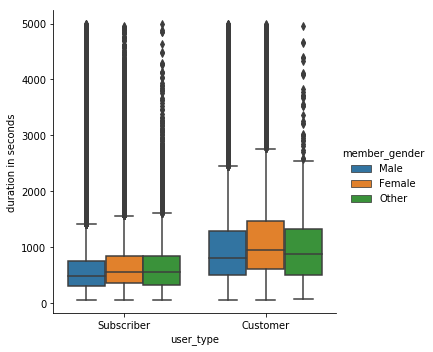

In [35]:
#Code : Boxplot
g = sb.catplot(x="user_type", y="duration_sec", hue="member_gender", kind="box",
                  data=df.query('duration_sec < 5000'))
g.set_xlabels('user_type')
g.set_ylabels('duration in seconds')
plt.show()

As we can see here , Female customers tend to travel more in duration than Male Customers in terms of the Boxplot. Infact , This trend can also be noticed in the Subscriber too. Another pretty important thing we can observe is Female customers tend to take more duration than Female subscribers

**Secondly, in terms of user types and gender,  i wan to see the distribution of data when we compare to age to get a good sense of idea**

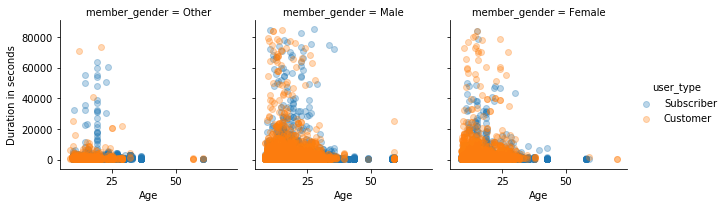

In [36]:
#Code: Scatter plot
g = sb.FacetGrid(data=df ,col = 'member_gender' , hue = 'user_type')
g.map(plt.scatter , 'member_age','duration_sec' , alpha = 0.3).add_legend()
g.set_xlabels('Age')
g.set_ylabels('Duration in seconds')
g.set_xticklabels()
plt.show()

As we can see that Male and Female riders whether they are subscriber or customer tend to have a similar duration in terms of age.

**Thirdly, knowing more about the users.**

From a Sales persepective. It is important to know about the target customer. But it's even important to know whether the customers are regulars or just causual users. Subscribers tend to generate more revenue. But a good start would be to know the age of the customers.

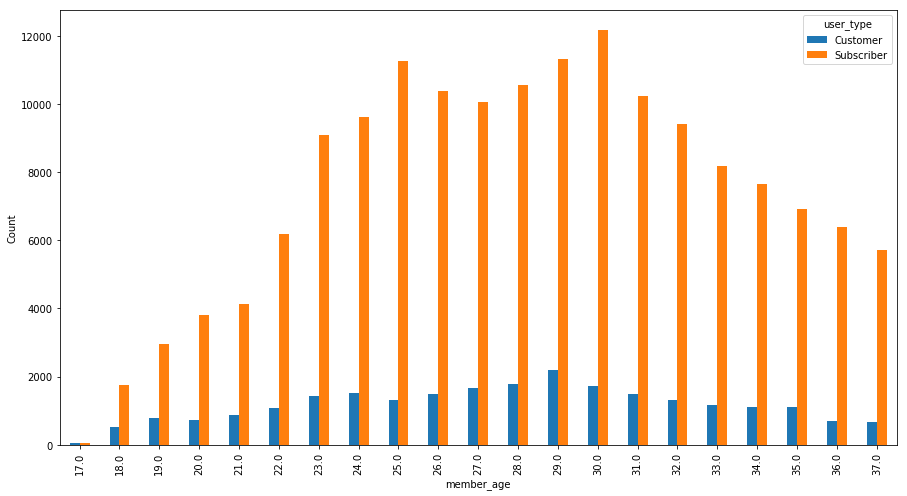

In [37]:
#Code: barchar showing memeber_age >1980
pd.crosstab(df.query('member_birth_year > 1980')['member_age'] ,
            df.query('member_birth_year > 1980')['user_type']).plot(kind = 'bar' , figsize = (15 ,8))
plt.xlabel('member_age')
plt.ylabel('Count')
plt.show()

In our case , We can see that people above the age of 24 and below 34 tend to be our subscribers in a higher amount. This can be our target audience in order to lure them to subscribe with us.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> **The users:**  The relationship between users(subscrbers) and age, since subscribers are generate the most revenue the age group who generate the most are the users at age 30.

> **Age:** The distrubution of the data between male and female gender riders whether they are subscriber or customer tend to have a similar duration in terms of age.

>**Gender:** Female customers tend to travel more in duration than Male Customers

### Were there any interesting or surprising interactions between features?

> Gender and user type had a surprising interaction. Where women spend more time as a customer as compared to subscribers.

# Summary

After a preliminary wrangling of the dataset, exploration and assessing.

1. **Duration in seconds** averages 807 seconds, with explanatory analysis a need for Log transformation was used to figure out duration seconds less than 5000 records was 253962 records out of a total sample length of 256299 about 99.09% of the dataset,with a right skewed distribution.

2. **Duration in seconds by users** Subscriber users turned out to be the most users with over 200 thousand rides,intresting that the customer users take longer duration in seconds and riders whether they are subscriber or customer tend to have a similar duration in terms of age.

3. **Target Audience** based of the exploration above, knowing more about the users if the they are subscribers or customers, where subscribers tend generate more revenues with a good start knowing people hitting their 30's really love biking. Hence, the target audience where digital marketing can also increase number of subscribers.

**REFERENCES:**

1. https://seaborn.pydata.org/tutorial/categorical.html
2. https://www.fordgobike.com
3. http://walkerke.github.io/geog30323/slides/eda-2/#/bar-charts-1